In [45]:
import numpy as np 
import pandas as pd 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import nltk
import gensim
import pyLDAvis
import pyLDAvis.gensim_models
from tqdm import tqdm

In [46]:
df = pd.read_excel('TwitterDataset.xlsx')

/Users/yaoyutong/opt/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [47]:
df.head()

,Tweet Id,Date,Hour,User Name,Nickname,Tweet content,Favs,RTs,Latitude,Longitude,Followers
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NaN,NaN,40.760278,-72.954722,386.0
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,Pausa pro café antes de embarcar no próximo vô...,NaN,NaN,32.898349,-97.039196,812.0
2,721318434169102336,2016-04-16,12:44,Kasey Jacobs,KJacobs27,Good. Morning. #morning #Saturday #diner #VT #...,NaN,NaN,44.199476,-72.504173,179.0
3,721318429844582400,2016-04-16,12:44,Stan Curtis,stncurtis,@gratefuldead recordstoredayus 🌹🌹🌹 @ TOMS MUSI...,NaN,NaN,39.901474,-76.606817,1229.0
4,721318429081407488,2016-04-16,12:44,Dave Borzymowski,wi_borzo,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,NaN,NaN,43.060849,-87.998309,129.0


In [48]:
df=df.rename(columns={'Tweet content':'Tweet_content'})

In [49]:
# T1-1
#Fill 0 into the NA
df = df.fillna(0)
df['ranked_score'] = df['Favs'] + df['RTs']

In [50]:
#Sort the dataframe according to Popularity_rank
df1 = df.sort_values(by='ranked_score', ascending=False)

In [262]:
df1.head(10)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet_content,Favs,RTs,Latitude,Longitude,Followers,ranked_score
27885,721167832923443200,2016-04-16,02:46,MALUMA,maluma,Y DELE 💪🏻💪🏻💪🏻... Viernes por la noche sin excu...,2089.0,449.0,19.433300,-99.133300,2525716.0,2538.0
66398,721120295143239687,2016-04-15,23:37,MALUMA,maluma,Hoy me dieron esta sorpresa en @Estacanon un p...,2006.0,425.0,19.433300,-99.133300,2525565.0,2431.0
157068,720732972433993728,2016-04-14,21:58,MALUMA,maluma,AGRADECER... Regla #1!! \nGracias a los medios...,1847.0,426.0,19.433300,-99.133300,2525716.0,2273.0
116629,721003913734918144,2016-04-15,15:55,MALUMA,maluma,"😇😈 @ Mexico City, Mexico https://t.co/8I2GyzaVWL",1576.0,373.0,19.433300,-99.133300,2525716.0,1949.0
121716,720981520425594882,2016-04-15,14:26,MALUMA,maluma,"""MEDALLO PARAÍSO"" nueva colección amelissaenli...",1550.0,313.0,19.433300,-99.133300,2525716.0,1863.0
54940,721133353911488512,2016-04-16,00:29,Charlotte Ross,charlotteross,Do I look bloated? 😊 @amellywood &amp; @echok ...,853.0,499.0,34.122810,-118.387495,349595.0,1352.0
95185,721025968278609920,2016-04-15,17:22,Tanya Burr,TanyaBurr,I'm snapchatting all day at Coachella so add m...,477.0,103.0,33.824000,-116.530000,1812679.0,580.0
203566,720561387030867968,2016-04-14,10:36,MALUMA,maluma,Batman o SuperMan? @ Miami International Airpo...,356.0,70.0,25.794870,-80.277342,2513119.0,426.0
37377,721154718161051648,2016-04-16,01:54,Alfredo Flores,AlfredoFlores,Ya boy has arriveeddddd 😝🤘🏽 #coachella @ La Qu...,243.0,153.0,33.675400,-116.297000,2742081.0,396.0
48524,721140633197350912,2016-04-16,00:58,Fran,_Franncis,Prom &amp; dodger game tonight w/my lover 😻💙 h...,237.0,100.0,34.074084,-118.240739,752.0,337.0


In [263]:
#Show the top 10 tweets
df1['Tweet_content'].head(10)

27885     Y DELE 💪🏻💪🏻💪🏻... Viernes por la noche sin excu...
66398     Hoy me dieron esta sorpresa en @Estacanon un p...
157068    AGRADECER... Regla #1!! \nGracias a los medios...
116629     😇😈 @ Mexico City, Mexico https://t.co/8I2GyzaVWL
121716    "MEDALLO PARAÍSO" nueva colección amelissaenli...
54940     Do I look bloated? 😊 @amellywood &amp; @echok ...
95185     I'm snapchatting all day at Coachella so add m...
203566    Batman o SuperMan? @ Miami International Airpo...
37377     Ya boy has arriveeddddd 😝🤘🏽 #coachella @ La Qu...
48524     Prom &amp; dodger game tonight w/my lover 😻💙 h...
Name: Tweet_content, dtype: object

In [264]:
# T1-2

In [265]:
df2 = df.sort_values(by='Followers', ascending=False)

In [266]:
df2.head(10)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet_content,Favs,RTs,Latitude,Longitude,Followers,ranked_score
12161,721213317952307200,2016-04-16,05:47,WEREVERTUMORRO,werevertumorro,Last night!! @ La Santa Puerto Vallarta https:...,96.0,14.0,20.644933,-105.236150,7232508.0,110.0
135321,720883379785179136,2016-04-15,07:56,WEREVERTUMORRO,werevertumorro,Separados al nacer @ STRANA NightClub Puerto V...,40.0,2.0,20.637600,-105.232900,7230218.0,42.0
106965,721013913303846913,2016-04-15,16:34,Joel McHale,joelmchale,This is most likely @michaelstrahan &amp; I my...,34.0,4.0,40.745342,-73.998725,3804447.0,38.0
168260,720707380850221056,2016-04-14,20:16,Questlove Gomez,questlove,Come to a special #BowlTrain at @brooklynbowl ...,19.0,11.0,40.722060,-73.957550,3627124.0,30.0
149113,720774200277880832,2016-04-15,00:42,Questlove Gomez,questlove,Tonight. I just might give some away just beca...,45.0,14.0,40.722060,-73.957550,3627104.0,59.0
68071,721118547355668480,2016-04-15,23:30,Gabrielle Union,itsgabrielleu,LA Dayzzzz... Clearly I love my sneakers 👀👀👀🔥🔥...,69.0,7.0,34.052200,-118.243000,3043036.0,76.0
37377,721154718161051648,2016-04-16,01:54,Alfredo Flores,AlfredoFlores,Ya boy has arriveeddddd 😝🤘🏽 #coachella @ La Qu...,243.0,153.0,33.675400,-116.297000,2742081.0,396.0
121716,720981520425594882,2016-04-15,14:26,MALUMA,maluma,"""MEDALLO PARAÍSO"" nueva colección amelissaenli...",1550.0,313.0,19.433300,-99.133300,2525716.0,1863.0
27885,721167832923443200,2016-04-16,02:46,MALUMA,maluma,Y DELE 💪🏻💪🏻💪🏻... Viernes por la noche sin excu...,2089.0,449.0,19.433300,-99.133300,2525716.0,2538.0
116629,721003913734918144,2016-04-15,15:55,MALUMA,maluma,"😇😈 @ Mexico City, Mexico https://t.co/8I2GyzaVWL",1576.0,373.0,19.433300,-99.133300,2525716.0,1949.0


In [267]:
#Find the top 10 users
df2['User Name'].head(10)


12161      WEREVERTUMORRO
135321     WEREVERTUMORRO
106965        Joel McHale
168260    Questlove Gomez
149113    Questlove Gomez
68071     Gabrielle Union
37377      Alfredo Flores
121716             MALUMA
27885              MALUMA
116629             MALUMA
Name: User Name, dtype: object

In [ ]:
#T1-3

In [65]:
#Choose the specifice date of the data
df3 = df[df["Date"]=='2016-04-16']

In [67]:
#Create a column that records the hour of the time
df3['HourAlone'] = df3['Hour'].map(lambda x:x.split(':')[0])

/Users/yaoyutong/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
#Count the tweets in each hour by grouping by HourAlone method
df4 = df3.groupby("HourAlone").count()

In [69]:
df4

,Tweet Id,Date,Hour,User Name,Nickname,Tweet_content,Favs,RTs,Latitude,Longitude,Followers,ranked_score
HourAlone,,,,,,,,,,,,
00,13317,13317,13317,13317,13317,13317,13317,13317,13317,13317,13317,13317
01,11745,11745,11745,11745,11745,11745,11745,11745,11745,11745,11745,11745
02,10610,10610,10610,10610,10610,10610,10610,10610,10610,10610,10610,10610
03,8418,8418,8418,8418,8418,8418,8418,8418,8418,8418,8418,8418
04,353,353,353,353,353,353,353,353,353,353,353,353
05,5583,5583,5583,5583,5583,5583,5583,5583,5583,5583,5583,5583
06,755,755,755,755,755,755,755,755,755,755,755,755
07,3123,3123,3123,3123,3123,3123,3123,3123,3123,3123,3123,3123
08,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509


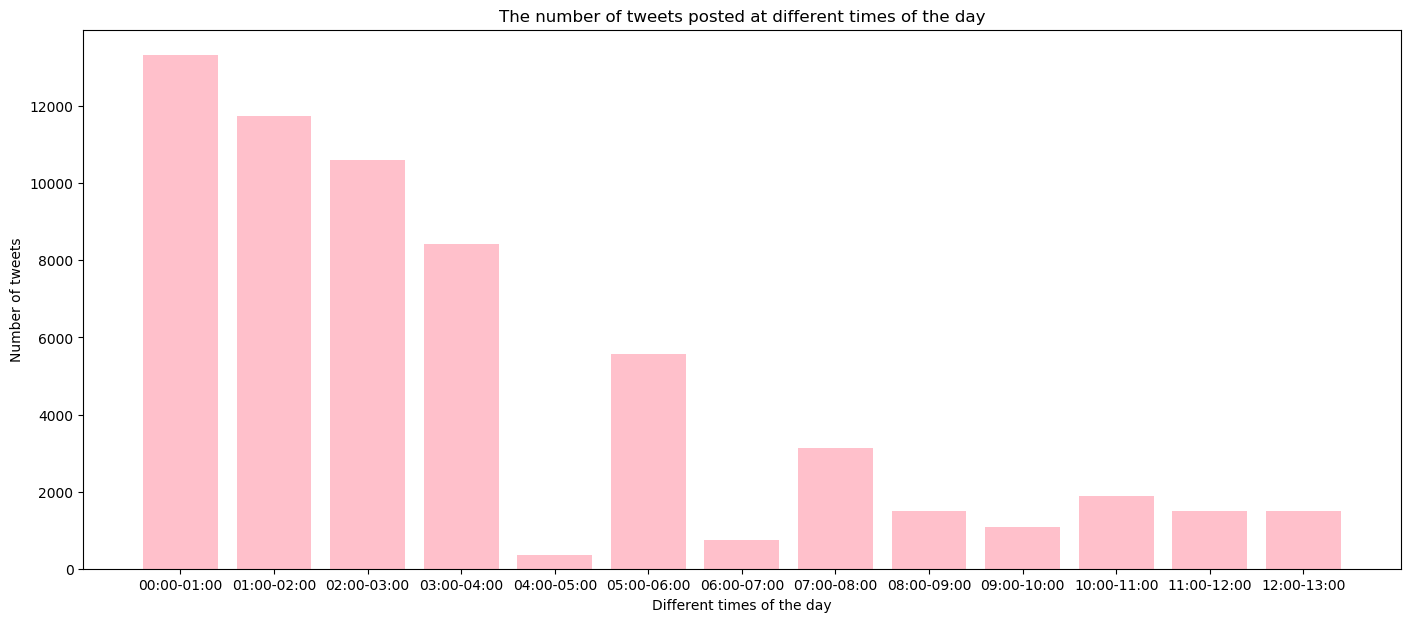

In [74]:
#Visualization
tweet_num = np.array(df4['Tweet Id'])
time=['00:00-01:00','01:00-02:00','02:00-03:00','03:00-04:00','04:00-05:00','05:00-06:00','06:00-07:00','07:00-08:00','08:00-09:00','09:00-10:00','10:00-11:00','11:00-12:00', '12:00-13:00']
num=tweet_num
plt.figure(figsize=(17,7))
plt.bar(range(len(num)),num,color='pink')
plt.xticks(range(len(num)),time)
plt.xlabel('Different times of the day')
plt.ylabel('Number of tweets')
plt.title('The number of tweets posted at different times of the day')
plt.show()

In [ ]:
#T1-4

In [268]:
import geopandas as gpd
#change the type of the dataframe into geo-dataframe
Geo_df=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Longitude,df.Latitude))

In [269]:
Geo_df.head()

,Tweet Id,Date,Hour,User Name,Nickname,Tweet_content,Favs,RTs,Latitude,Longitude,Followers,ranked_score,geometry
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",0.0,0.0,40.760278,-72.954722,386.0,0.0,POINT (-72.95472 40.76028)
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,Pausa pro café antes de embarcar no próximo vô...,0.0,0.0,32.898349,-97.039196,812.0,0.0,POINT (-97.03920 32.89835)
2,721318434169102336,2016-04-16,12:44,Kasey Jacobs,KJacobs27,Good. Morning. #morning #Saturday #diner #VT #...,0.0,0.0,44.199476,-72.504173,179.0,0.0,POINT (-72.50417 44.19948)
3,721318429844582400,2016-04-16,12:44,Stan Curtis,stncurtis,@gratefuldead recordstoredayus 🌹🌹🌹 @ TOMS MUSI...,0.0,0.0,39.901474,-76.606817,1229.0,0.0,POINT (-76.60682 39.90147)
4,721318429081407488,2016-04-16,12:44,Dave Borzymowski,wi_borzo,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,0.0,0.0,43.060849,-87.998309,129.0,0.0,POINT (-87.99831 43.06085)


In [251]:
#Read the US shp file
US=gpd.read_file('/Users/yaoyutong/Desktop/archive/cb_2016_us_state_500k.shp')
US_df = pd.DataFrame(US)
US_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,05,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,06,01779778,0400000US06,06,CA,California,00,403501101370,20466718403,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [222]:
US_df=US_df.rename(columns={'NAME':'US_States'})

In [223]:
#Create a new column called 'US_States' of Geo_df and write each tweet's belonging state
US_states_list=[]
for i in tqdm(range(len(Geo_df))):
    pnts=Geo_df['geometry'][i]
    for j in range(len(US_df)):
        if pnts.within(US_df.iloc[j]['geometry']):
            US_states_list.append(US_df.iloc[j]['US_States'])
            break
        if j==len(US_df)-1:
            US_states_list.append('Not_US')
Geo_df['US_States']=US_states_list

100%|██████████████████████████████████| 204820/204820 [25:47<00:00, 132.33it/s]


In [239]:
#Drop the data out of USA
Geo_df.drop(Geo_df[Geo_df['US_States'].str.contains(pat='Not_US',regex=False)==True].index,inplace=True) 

In [241]:
#Use the group by method to calculate the total number of tweets in each state
Geo_df_1=Geo_df.groupby('US_States').count()
Geo_df_1 = pd.DataFrame(Geo_df_1)
Geo_df_1['US_States'] = Geo_df_1.index
Geo_df_1=Geo_df_1.reset_index(drop=True)
Geo_df_1=Geo_df_1.rename(columns={'Tweet Id':'Tweet_num'})

In [242]:
Geo_df_1.head()

,Tweet_num,Date,Hour,User Name,Nickname,Tweet_content,Favs,RTs,Latitude,Longitude,Followers,geometry,US_States
0,1962,1962,1962,1962,1962,1962,60,51,1962,1962,1959,1962,Alabama
1,3862,3862,3862,3862,3862,3862,143,102,3862,3862,3862,3862,Arizona
2,1114,1114,1114,1114,1114,1114,24,9,1114,1114,1112,1114,Arkansas
3,31539,31539,31539,31539,31539,31539,1934,1220,31539,31539,31528,31539,California
4,3205,3205,3205,3205,3205,3205,112,79,3205,3205,3205,3205,Colorado


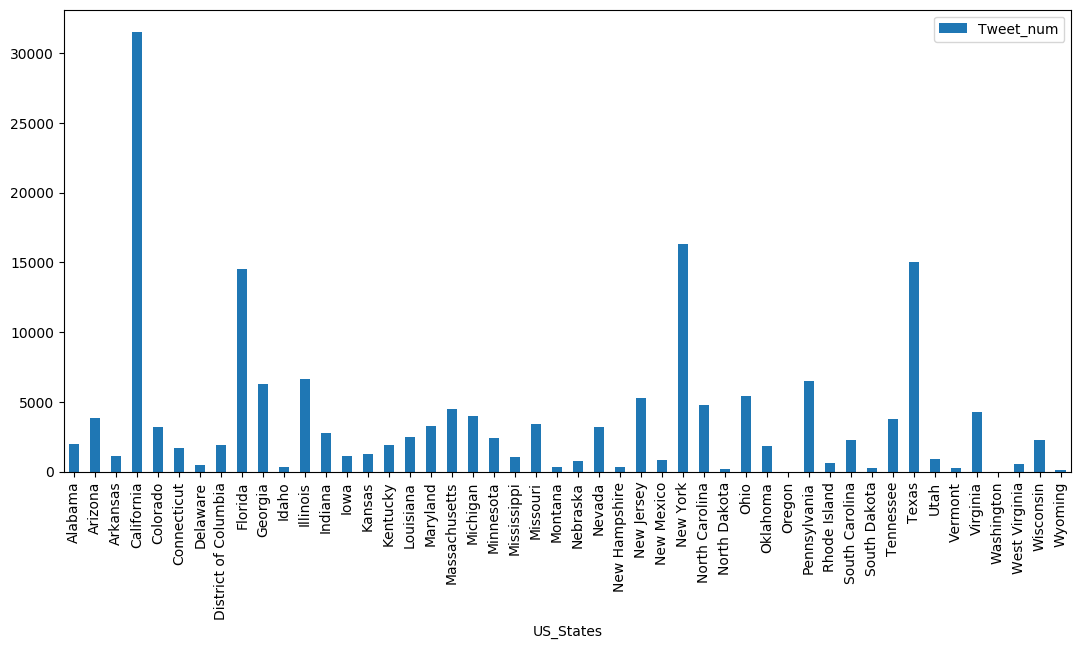

In [252]:
#Visualization
Geo_df_2 = pd.DataFrame({"US_States":Geo_df_1.US_States, 'Tweet_num':Geo_df_1.Tweet_num})
Geo_df_2.plot.bar(x='US_States', y='Tweet_num',figsize=(13,6))

In [245]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default='browser'

In [246]:
#Merge the dataframes to add a STUSPS column
Geo_df_3=Geo_df_1.merge(US_df, on='US_States')
Geo_df_4=Geo_df_3[['Tweet_num','US_States','STUSPS']]

In [247]:
Geo_df_4.head()

,Tweet_num,US_States,STUSPS
0,1962,Alabama,AL
1,3862,Arizona,AZ
2,1114,Arkansas,AR
3,31539,California,CA
4,3205,Colorado,CO


In [250]:
#Visualization
#Please notice that the figure will be shown in Google Chrome page
fig=px.choropleth(Geo_df_4,
                 locations='STUSPS',
                 locationmode='USA-states',
                 scope='usa',
                 color='Tweet_num',
                 hover_name='US_States',
                 hover_data=['Tweet_num'],
                 range_color=[100,40000],)


fig.show()

In [51]:
#T2
df.head(5)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet_content,Favs,RTs,Latitude,Longitude,Followers,ranked_score
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",0.0,0.0,40.760278,-72.954722,386.0,0.0
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,Pausa pro café antes de embarcar no próximo vô...,0.0,0.0,32.898349,-97.039196,812.0,0.0
2,721318434169102336,2016-04-16,12:44,Kasey Jacobs,KJacobs27,Good. Morning. #morning #Saturday #diner #VT #...,0.0,0.0,44.199476,-72.504173,179.0,0.0
3,721318429844582400,2016-04-16,12:44,Stan Curtis,stncurtis,@gratefuldead recordstoredayus 🌹🌹🌹 @ TOMS MUSI...,0.0,0.0,39.901474,-76.606817,1229.0,0.0
4,721318429081407488,2016-04-16,12:44,Dave Borzymowski,wi_borzo,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,0.0,0.0,43.060849,-87.998309,129.0,0.0


In [52]:
# T2-1
# Delete the redundant and problematic information
df['Tweet_content'] = df['Tweet_content'].apply(lambda x:re.sub('www.\S+|https\S+|[^\w\s]|\n\n', ' ', x.lower()))

<>:3: DeprecationWarning: invalid escape sequence \S
<>:3: DeprecationWarning: invalid escape sequence \S
<>:3: DeprecationWarning: invalid escape sequence \S
/var/folders/cy/10_ddz1x6y7c0kd73m93hfx40000gn/T/ipykernel_46151/705816683.py:3: DeprecationWarning: invalid escape sequence \S
  df['Tweet_content'] = df['Tweet_content'].apply(lambda x:re.sub('www.\S+|https\S+|[^\w\s]|\n\n', ' ', x.lower()))


In [53]:
df.head(5)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet_content,Favs,RTs,Latitude,Longitude,Followers,ranked_score
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,wind 3 2 mph nne barometer 30 20 in rising s...,0.0,0.0,40.760278,-72.954722,386.0,0.0
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,pausa pro café antes de embarcar no próximo vô...,0.0,0.0,32.898349,-97.039196,812.0,0.0
2,721318434169102336,2016-04-16,12:44,Kasey Jacobs,KJacobs27,good morning morning saturday diner vt ...,0.0,0.0,44.199476,-72.504173,179.0,0.0
3,721318429844582400,2016-04-16,12:44,Stan Curtis,stncurtis,gratefuldead recordstoredayus toms musi...,0.0,0.0,39.901474,-76.606817,1229.0,0.0
4,721318429081407488,2016-04-16,12:44,Dave Borzymowski,wi_borzo,egg in a muffin rocket baby bakery ro...,0.0,0.0,43.060849,-87.998309,129.0,0.0


In [54]:
# T2-2
# Do the stemming
stemmer = PorterStemmer()

In [55]:
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [56]:
df["Tweet_content"] = df["Tweet_content"].apply(lambda x: stem_words(x))

In [57]:
df.head(5)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet_content,Favs,RTs,Latitude,Longitude,Followers,ranked_score
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,wind 3 2 mph nne baromet 30 20 in rise slowli ...,0.0,0.0,40.760278,-72.954722,386.0,0.0
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,pausa pro café ant de embarcar no próximo vôo ...,0.0,0.0,32.898349,-97.039196,812.0,0.0
2,721318434169102336,2016-04-16,12:44,Kasey Jacobs,KJacobs27,good morn morn saturday diner vt breakfast nuc...,0.0,0.0,44.199476,-72.504173,179.0,0.0
3,721318429844582400,2016-04-16,12:44,Stan Curtis,stncurtis,gratefuldead recordstoredayu tom music trade,0.0,0.0,39.901474,-76.606817,1229.0,0.0
4,721318429081407488,2016-04-16,12:44,Dave Borzymowski,wi_borzo,egg in a muffin rocket babi bakeri rocketbabyb...,0.0,0.0,43.060849,-87.998309,129.0,0.0


In [58]:
# Delete the Stop word
stop = stopwords.words('english')

In [59]:
df['Tweet_content'] = df['Tweet_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [60]:
df.head(5)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet_content,Favs,RTs,Latitude,Longitude,Followers,ranked_score
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,wind 3 2 mph nne baromet 30 20 rise slowli tem...,0.0,0.0,40.760278,-72.954722,386.0,0.0
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,pausa pro café ant de embarcar próximo vôo tri...,0.0,0.0,32.898349,-97.039196,812.0,0.0
2,721318434169102336,2016-04-16,12:44,Kasey Jacobs,KJacobs27,good morn morn saturday diner vt breakfast nuc...,0.0,0.0,44.199476,-72.504173,179.0,0.0
3,721318429844582400,2016-04-16,12:44,Stan Curtis,stncurtis,gratefuldead recordstoredayu tom music trade,0.0,0.0,39.901474,-76.606817,1229.0,0.0
4,721318429081407488,2016-04-16,12:44,Dave Borzymowski,wi_borzo,egg muffin rocket babi bakeri rocketbabybak wa...,0.0,0.0,43.060849,-87.998309,129.0,0.0


In [61]:
#Delete the number
df['Tweet_content'] = df['Tweet_content'].apply(lambda x:re.sub('\d+', '', x))

<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
/var/folders/cy/10_ddz1x6y7c0kd73m93hfx40000gn/T/ipykernel_46151/2563795655.py:2: DeprecationWarning: invalid escape sequence \d
  df['Tweet_content'] = df['Tweet_content'].apply(lambda x:re.sub('\d+', '', x))


In [62]:
df.head(5)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet_content,Favs,RTs,Latitude,Longitude,Followers,ranked_score
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,wind mph nne baromet rise slowli temperatu...,0.0,0.0,40.760278,-72.954722,386.0,0.0
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,pausa pro café ant de embarcar próximo vôo tri...,0.0,0.0,32.898349,-97.039196,812.0,0.0
2,721318434169102336,2016-04-16,12:44,Kasey Jacobs,KJacobs27,good morn morn saturday diner vt breakfast nuc...,0.0,0.0,44.199476,-72.504173,179.0,0.0
3,721318429844582400,2016-04-16,12:44,Stan Curtis,stncurtis,gratefuldead recordstoredayu tom music trade,0.0,0.0,39.901474,-76.606817,1229.0,0.0
4,721318429081407488,2016-04-16,12:44,Dave Borzymowski,wi_borzo,egg muffin rocket babi bakeri rocketbabybak wa...,0.0,0.0,43.060849,-87.998309,129.0,0.0


In [63]:
# Do the tokenization
import nltk
df['Tweet_content'] = df.apply(lambda row: nltk.word_tokenize(row['Tweet_content']), axis=1)

In [64]:
#Show the result after processing the redundant information
df.head(5)

,Tweet Id,Date,Hour,User Name,Nickname,Tweet_content,Favs,RTs,Latitude,Longitude,Followers,ranked_score
0,721318437075685382,2016-04-16,12:44,Bill Schulhoff,BillSchulhoff,"[wind, mph, nne, baromet, rise, slowli, temper...",0.0,0.0,40.760278,-72.954722,386.0,0.0
1,721318436173979648,2016-04-16,12:44,Daniele Polis,danipolis,"[pausa, pro, café, ant, de, embarcar, próximo,...",0.0,0.0,32.898349,-97.039196,812.0,0.0
2,721318434169102336,2016-04-16,12:44,Kasey Jacobs,KJacobs27,"[good, morn, morn, saturday, diner, vt, breakf...",0.0,0.0,44.199476,-72.504173,179.0,0.0
3,721318429844582400,2016-04-16,12:44,Stan Curtis,stncurtis,"[gratefuldead, recordstoredayu, tom, music, tr...",0.0,0.0,39.901474,-76.606817,1229.0,0.0
4,721318429081407488,2016-04-16,12:44,Dave Borzymowski,wi_borzo,"[egg, muffin, rocket, babi, bakeri, rocketbaby...",0.0,0.0,43.060849,-87.998309,129.0,0.0


In [21]:
#T3

In [22]:
#Model 1: LDA

In [65]:
docs = df['Tweet_content']

In [66]:
# Bag of words
dictionary = gensim.corpora.Dictionary(docs)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in docs]

In [67]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 baromet
1 f
2 humid
3 mph
4 nne
5 rain
6 rise
7 slowli
8 temperatur
9 today
10 wind


In [68]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [69]:
bow_corpus = [dictionary.doc2bow(doc) for doc in docs]
bow_corpus[50]

[(233, 1), (247, 1), (248, 1), (249, 1), (250, 1), (251, 1)]

In [70]:
bow_doc_50 = bow_corpus[50]
for i in range(len(bow_doc_50)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_50[i][0], 
                                               dictionary[bow_doc_50[i][0]], 
bow_doc_50[i][1]))

Word 233 ("south") appears 1 time.
Word 247 ("ave") appears 1 time.
Word 248 ("clear") appears 1 time.
Word 249 ("closur") appears 1 time.
Word 250 ("sb") appears 1 time.
Word 251 ("us") appears 1 time.


In [71]:
#The LDA model
model_LDA = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [72]:
topic_words = model_LDA.print_topics(num_topics=10, num_words=50) # Output the topic under each topic of this model
print(topic_words[0]) # Show the main words of the first topic

(0, '0.118*"job" + 0.074*"hire" + 0.047*"thi" + 0.038*"careerarc" + 0.036*"retail" + 0.032*"fit" + 0.032*"great" + 0.027*"sale" + 0.016*"could" + 0.015*"near" + 0.015*"anyon" + 0.015*"recommend" + 0.015*"interest" + 0.015*"might" + 0.014*"manag" + 0.014*"hospit" + 0.012*"store" + 0.011*"associ" + 0.011*"il" + 0.010*"servic" + 0.008*"fl" + 0.007*"ca" + 0.007*"tx" + 0.006*"custom" + 0.006*"alert" + 0.006*"sonic" + 0.006*"veteran" + 0.005*"customerservic" + 0.005*"repres" + 0.005*"appli" + 0.005*"chicago" + 0.005*"click" + 0.005*"physician" + 0.005*"assist" + 0.005*"oh" + 0.004*"part" + 0.004*"nc" + 0.004*"bank" + 0.004*"ny" + 0.004*"time" + 0.004*"nj" + 0.003*"team" + 0.003*"gener" + 0.003*"consult" + 0.003*"pa" + 0.003*"businessmgmt" + 0.003*"al" + 0.003*"corpor" + 0.003*"mi" + 0.003*"drive"')


In [73]:
for idx, topic in model_LDA.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.118*"job" + 0.074*"hire" + 0.047*"thi" + 0.038*"careerarc" + 0.036*"retail" + 0.032*"fit" + 0.032*"great" + 0.027*"sale" + 0.016*"could" + 0.015*"near"
Topic: 1 
Words: 0.015*"thi" + 0.013*"happi" + 0.013*"day" + 0.011*"san" + 0.010*"school" + 0.010*"love" + 0.010*"one" + 0.008*"year" + 0.008*"thank" + 0.008*"home"
Topic: 2 
Words: 0.029*"thi" + 0.017*"day" + 0.015*"tbt" + 0.013*"morn" + 0.013*"good" + 0.012*"get" + 0.011*"love" + 0.010*"come" + 0.010*"wa" + 0.010*"like"
Topic: 3 
Words: 0.053*"la" + 0.030*"pm" + 0.018*"am" + 0.015*"con" + 0.014*"high" + 0.013*"vega" + 0.012*"tonight" + 0.012*"low" + 0.011*"game" + 0.010*"win"
Topic: 4 
Words: 0.086*"de" + 0.032*"la" + 0.024*"df" + 0.022*"que" + 0.022*"el" + 0.021*"en" + 0.020*"mexico" + 0.018*"lo" + 0.018*"méxico" + 0.017*"mi"
Topic: 5 
Words: 0.029*"st" + 0.020*"traffic" + 0.019*"construct" + 0.016*"rd" + 0.014*"accid" + 0.014*"exit" + 0.014*"stop" + 0.013*"clear" + 0.013*"amp" + 0.012*"fl"
Topic: 6 
Words: 0.022*"

In [74]:
#Visualization the topic
pyLDAvis.enable_notebook()

In [75]:
vis = pyLDAvis.gensim_models.prepare(model_LDA, bow_corpus, dictionary)
pyLDAvis.display(vis)

/Users/yaoyutong/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


/Users/yaoyutong/opt/anaconda3/lib/python3.7/site-packages/past/translation/__init__.py:35: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/Users/yaoyutong/opt/anaconda3/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/yaoyutong/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/Users/yaoyutong/opt/anaconda3/lib/python3.7/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__ver

In [145]:
#Model 2: Top2Vec

In [162]:
df2=df[['Tweet_content']]

In [164]:
df3 = df2.Tweet_content.values.tolist()
type(df3)

list

In [300]:
docs=df3

In [19]:
import numpy as np 
import pandas as pd 
import json
import os
from top2vec import Top2Vec

In [20]:
#Train the Top2Vec model
model = Top2Vec(documents=df3, speed="learn", workers=8)

2022-10-29 16:10:03,353 - top2vec - INFO - Pre-processing documents for training
2022-10-29 16:10:07,844 - top2vec - INFO - Creating joint document/word embedding
2022-10-29 16:17:20,582 - top2vec - INFO - Creating lower dimension embedding of documents
2022-10-29 16:18:43,280 - top2vec - INFO - Finding dense areas of documents
2022-10-29 16:18:52,002 - top2vec - INFO - Finding topics


In [21]:
#Get the processed topic
model.get_num_topics()

2676

In [22]:
#Get the topic size and number
topic_sizes, topic_nums = model.get_topic_sizes()

In [23]:
topic_sizes

array([654, 566, 480, ...,  17,  16,  15])

In [24]:
topic_nums

array([   0,    1,    2, ..., 2673, 2674, 2675])

In [25]:
#Get the contained words in each topic
model.topic_words

array([['could', 'interested', 'near', ..., 'cane', 'elpaso', 'allstate'],
       ['varioususcities', 'winstonsalem', 'batonrouge', ...,
        'medexpress', 'sonic', 'daytonabeach'],
       ['longbeach', 'einstein', 'professional', ..., 'santabarbara',
        'fortmyers', 'viva'],
       ...,
       ['premise', 'practitioner', 'nurse', ..., 'med', 'clinic',
        'charges'],
       ['specialty', 'solutions', 'paper', ..., 'robert', 'sxsweco',
        'interpreters'],
       ['leesburg', 'cosmetology', 'rd', ..., 'blocked', 'traffic',
        'toll']], dtype='<U15')

In [26]:
#Get the contained words in topic one
model.topic_words[0]

array(['could', 'interested', 'near', 'varioususcities', 'meters',
       'nblsetarehvoto', 'ao', 'daytonabeach', 'fit', 'teamhealth',
       'restaurantjobs', 'milspouse', 'interpreter', 'nblligiavoto',
       'dtx', 'travelnurse', 'languageline', 'dental', 'stpetersburg',
       'fortsmith', 'seaworld', 'santabarbara', 'medfield',
       'redwoodshores', 'jdhuntr', 'asheville', 'winstonsalem', 'great',
       'waltham', 'odessa', 'shreveport', 'mountainview', 'markham',
       'htx', 'ihop', 'paramus', 'naples', 'allstatejobs', 'fortwayne',
       'pueblo', 'danville', 'modesto', 'alpharetta', 'marietta',
       'bilingual', 'secaucus', 'einstein', 'cane', 'elpaso', 'allstate'],
      dtype='<U15')

In [27]:
topic_words, word_scores, topic_nums = model.get_topics(5)
for words,scores,nums in zip(topic_words,word_scores,topic_nums):
    print("Topic Number",nums)
    print(f"Words:{words}")
    print("\n")

Topic Number 0
Words:['could' 'interested' 'near' 'varioususcities' 'meters' 'nblsetarehvoto'
 'ao' 'daytonabeach' 'fit' 'teamhealth' 'restaurantjobs' 'milspouse'
 'interpreter' 'nblligiavoto' 'dtx' 'travelnurse' 'languageline' 'dental'
 'stpetersburg' 'fortsmith' 'seaworld' 'santabarbara' 'medfield'
 'redwoodshores' 'jdhuntr' 'asheville' 'winstonsalem' 'great' 'waltham'
 'odessa' 'shreveport' 'mountainview' 'markham' 'htx' 'ihop' 'paramus'
 'naples' 'allstatejobs' 'fortwayne' 'pueblo' 'danville' 'modesto'
 'alpharetta' 'marietta' 'bilingual' 'secaucus' 'einstein' 'cane' 'elpaso'
 'allstate']


Topic Number 1
Words:['varioususcities' 'winstonsalem' 'batonrouge' 'ao' 'kilt' 'jdhuntr'
 'want' 'lebanon' 'lawrenceville' 'restaurantjobs' 'work' 'florence'
 'fortsmith' 'baton' 'annarbor' 'view' 'simon' 'covington' 'bartender'
 'accountable' 'soma' 'ocala' 'nashua' 'interpreter' 'cosmetology'
 'hostess' 'restaurantlife' 'milspouse' 'joplin' 'mansfield' 'bridgewater'
 'brentwood' 'medfield' 'r

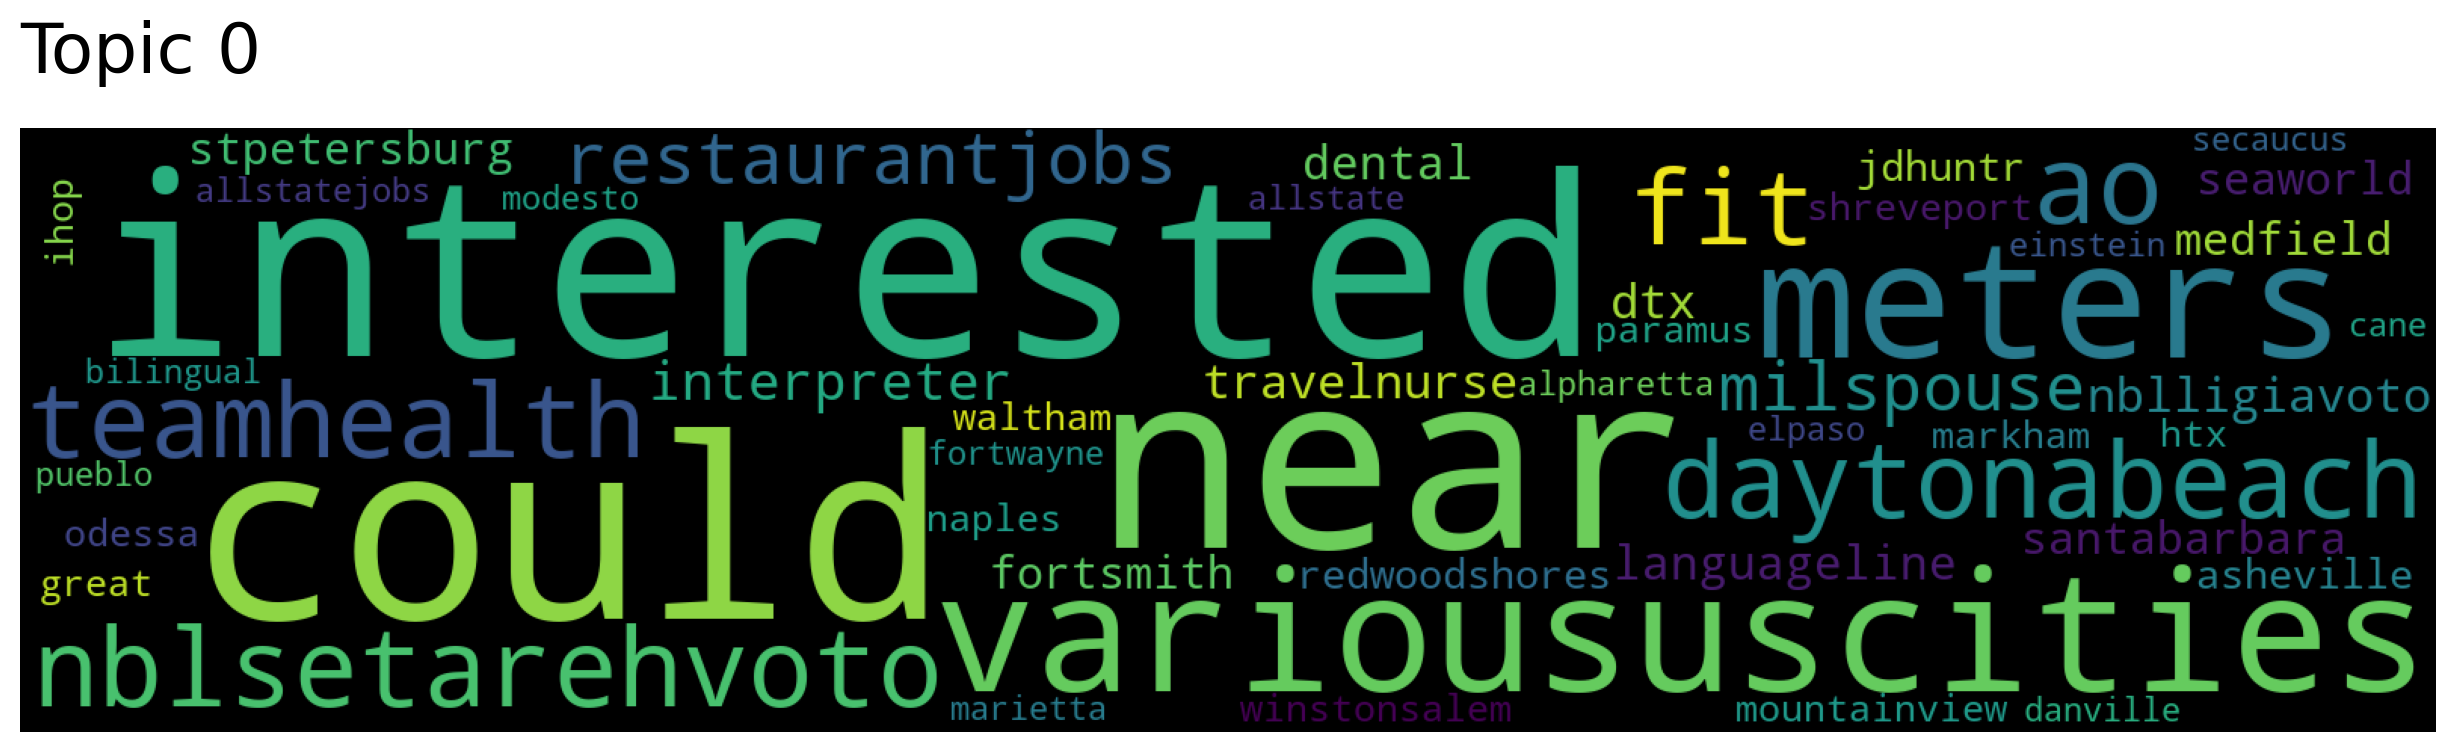

In [28]:
#Show the contained words in the topic by cloud map
model.generate_topic_wordcloud(0)

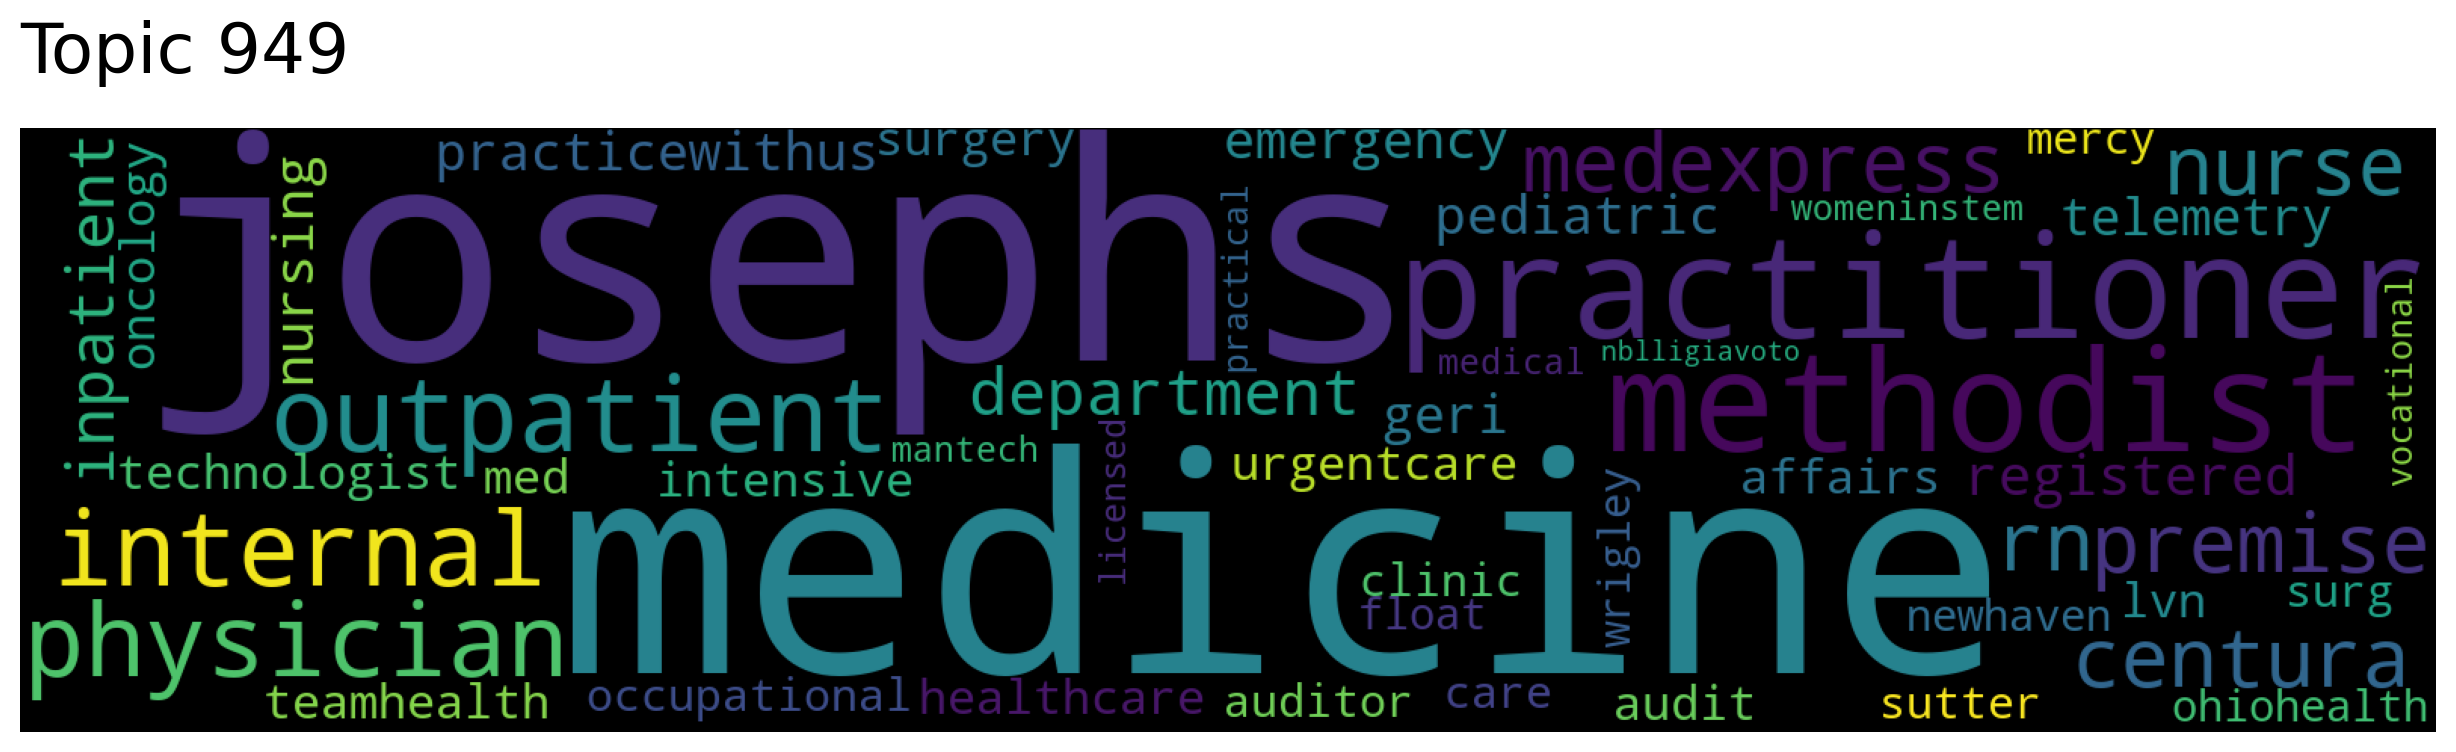

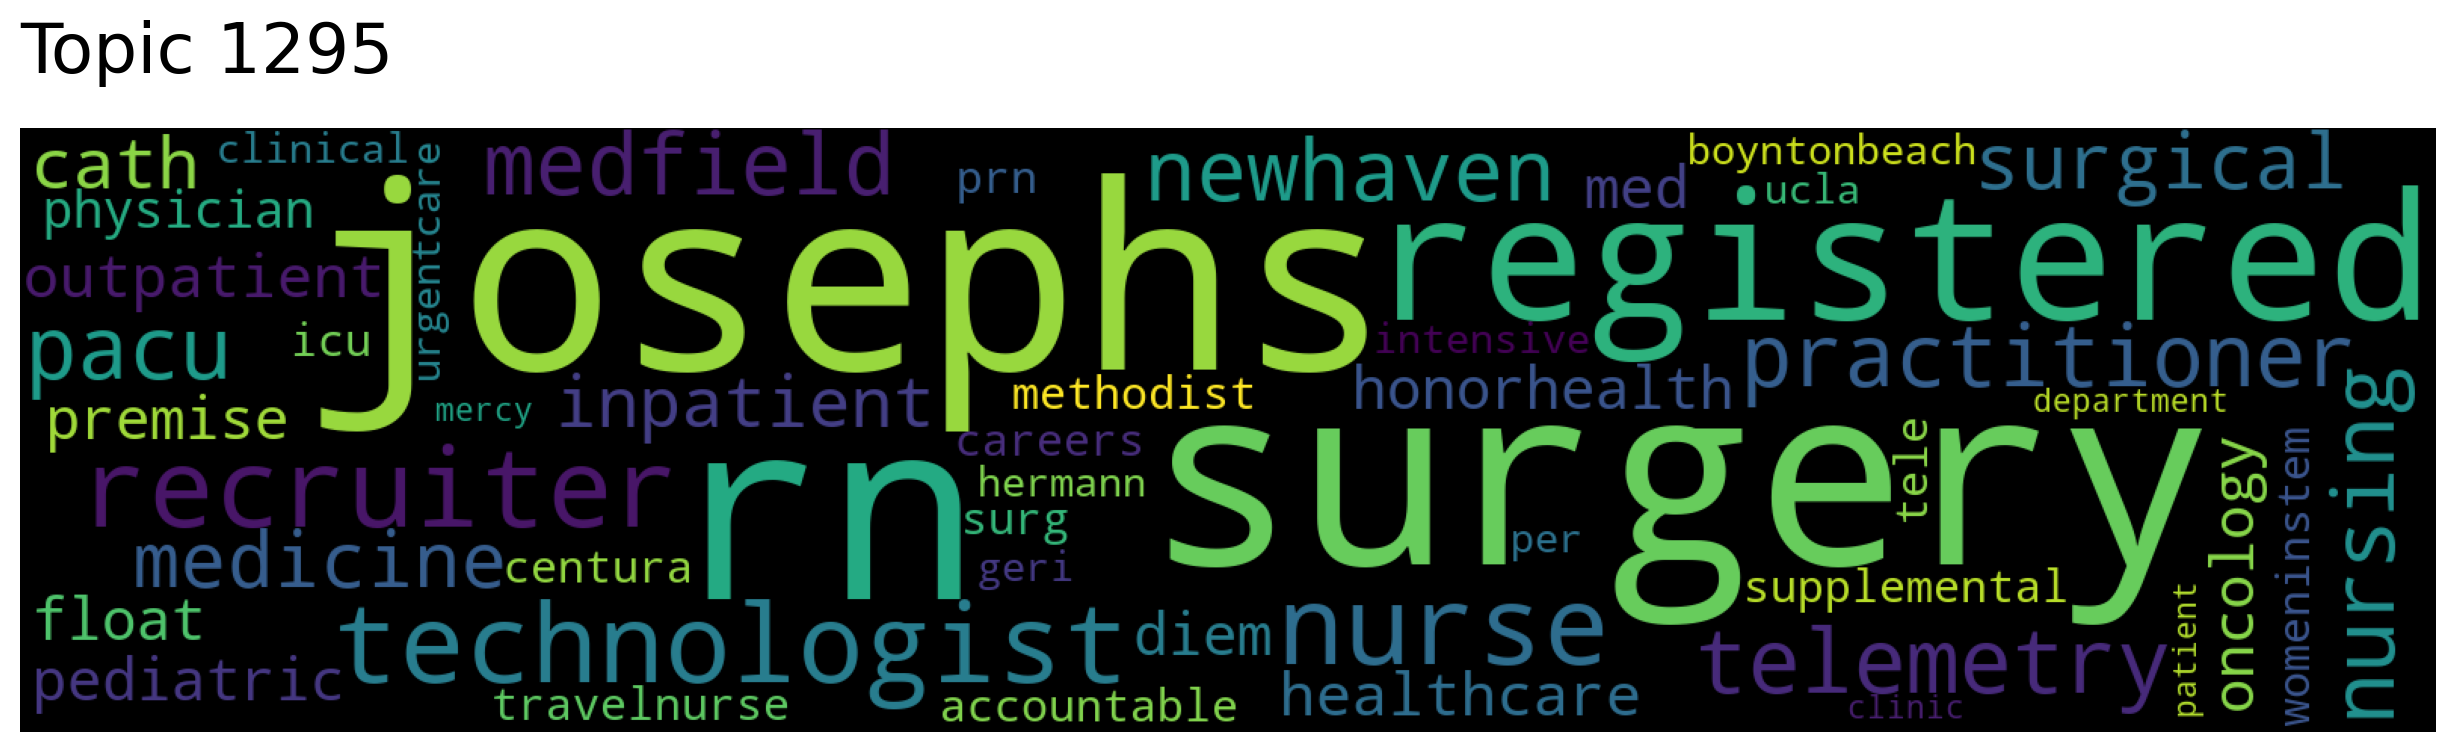

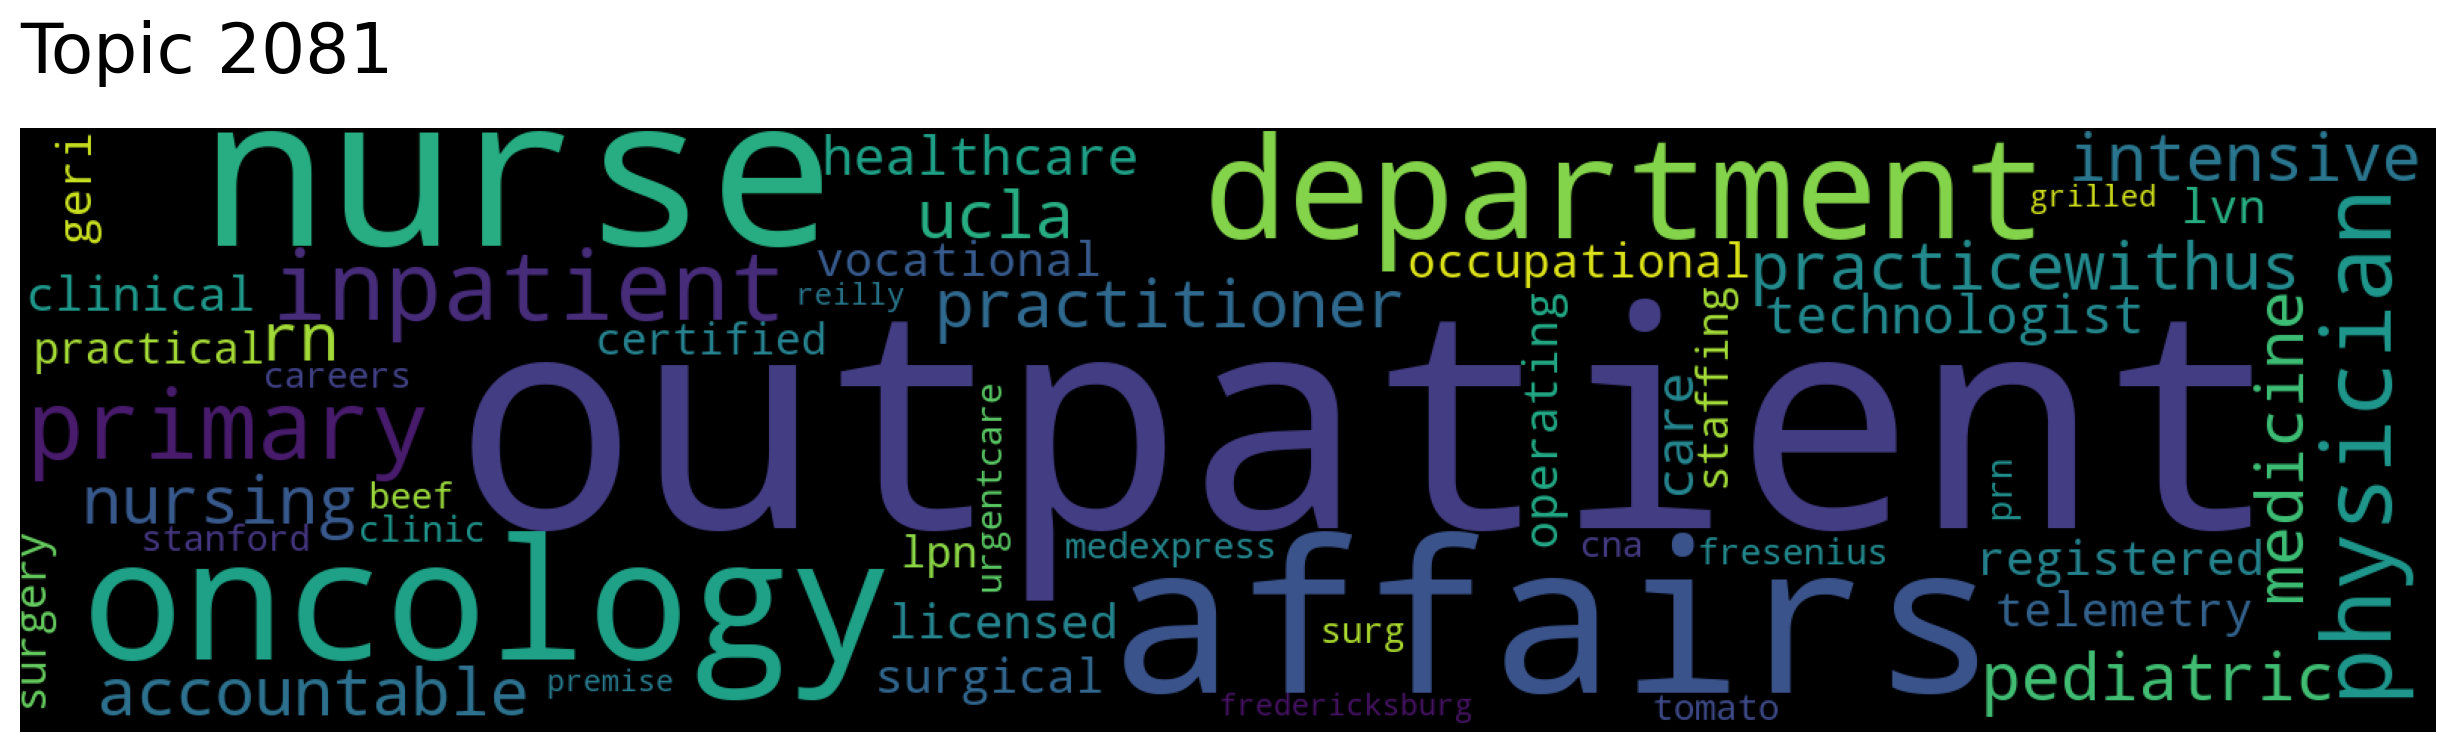

In [29]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["medicine"], num_topics=3)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [30]:
#Show the related documents in the topic 48
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=48, num_docs=5)

In [31]:
#Show the related documents and the correponding matching scores in the topic 48 
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=48, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 202648, Score: 0.942668616771698
-----------
seen porpoise capefeartrip
-----------

Document: 154573, Score: 0.9426091313362122
-----------
loaf guys breadgang keeneland
-----------

Document: 67568, Score: 0.9414467811584473
-----------
deejquintana swarthemaster panageeo guys
-----------

Document: 29861, Score: 0.9343987107276917
-----------
ruins pripyat seen drone
-----------

Document: 201634, Score: 0.9318413138389587
-----------
dense guys manning bono eldest
-----------

